## Sentiment Analysis of Tweets

In [ ]:
#!pip install wordcloud
#!pip install tweet-preprocessor

In [12]:
import pandas as pd
import nltk
import preprocessor as p
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\migue\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\migue\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
# https://www.kaggle.com/datasets/gargmanas/sentimental-analysis-for-tweets?select=sentiment_tweets3.csv
# Permite ver completo el contenido de las columnas
pd.set_option('display.max_colwidth', None)

df = pd.read_csv('C:/Users/migue/Downloads/sentiment_tweets3.csv')
df.head(5)

,Index,message to examine,label (depression result)
0,106,"just had a real good moment. i missssssssss him so much,",0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http://www.youtube.com/watch?v=zoGfqvh2ME8,0
3,288,"@lapcat Need to send 'em to my accountant tomorrow. Oddly, I wasn't even referring to my taxes. Those are supporting evidence, though.",0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [5]:
len(df.index)

10314

In [6]:
df.columns

Index(['Index', 'message to examine', 'label (depression result)'], dtype='object')

In [7]:
# Se renombra las columnas

df = df.rename(columns={'message to examine': 'message', 'label (depression result)': 'label'})
df.columns
#Se mantiene solo las columnas necesarias: message y Label
df = df[['message', 'label']]
df.head(5)


,message,label
0,"just had a real good moment. i missssssssss him so much,",0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http://www.youtube.com/watch?v=zoGfqvh2ME8,0
3,"@lapcat Need to send 'em to my accountant tomorrow. Oddly, I wasn't even referring to my taxes. Those are supporting evidence, though.",0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [8]:
# Verificación de valores nulos en el dataframe

df.isnull().sum()

message    0
label      0
dtype: int64

In [9]:
# Eliminación de duplicados

df = df.drop_duplicates()

In [10]:
# verificar los valores unicos en la columan Label

u = df["label"].unique()
print("There are {} unique values in the  column label:\n{}".format(len(u), u))

d = df[df["label"] == 1]
print(d.columns)
nd = df[df["label"] == 0]

print("There are {} persons with depression".format(len(d)))
print("There are {} persons without depression".format(len(nd)))

There are 2 unique values in the  column label:
[0 1]
Index(['message', 'label'], dtype='object')
There are 2287 persons with depression
There are 7996 persons without depression


In [13]:
# Se elimina las palabras que esten en la variable stop_words
stop_words = set(stopwords.words('english'))
punct = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''

# cleaning of URLs URLs, hashtags, Mentions, Emojis, Reserved words (RT, FAV)
df["message"] = df["message"].apply(lambda x: p.clean(x))
# stop_words is set of commonly used words in english
df["message"] = df["message"].apply(lambda x: " ".join([w for w in x.split() if w not in (stop_words)]))
# Eliminacion de puntuaciones
df["message"] = df["message"].apply(lambda x: "".join([w for w in x if w not in (punct)]))

df.head(5)

,message,label
0,real good moment missssssssss much,0
1,reading manga,0
2,,0
3,Need send em accountant tomorrow Oddly I even referring taxes Those supporting evidence though,0
4,ADD ME ON MYSPACE,0


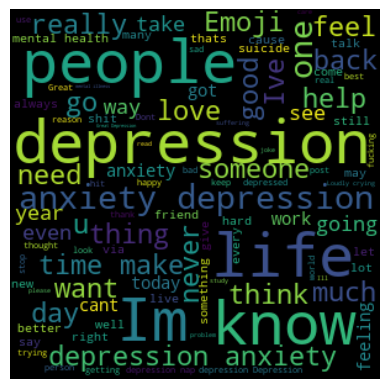

In [14]:
#Creamos la nube de palabras para depresivos, aquellos que tienen en su campo "Label" el valor 1
d = df[df["label"] == 1]
text1 = " ".join(tweet for tweet in d.message)
wc = WordCloud(width=300, height=300, max_words=100, repeat=True).generate(text1)

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloudDep.png')
plt.show()


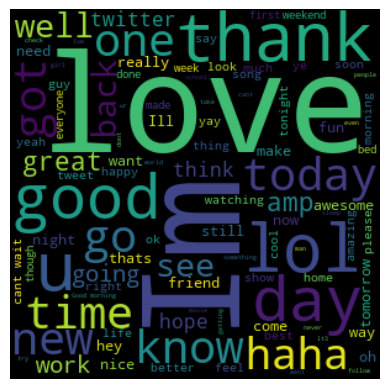

In [15]:
#Creamos la nube de palabras para no depresivos, aquellos que tienen en su campo "Label" el valor 0
nd = df[df["label"] == 0]
text2 = " ".join(tweet for tweet in nd.message)
wc2 = WordCloud(width=300, height=300, max_words=100, repeat=True).generate(text2)


plt.imshow(wc2, interpolation='bilinear')
plt.axis("off")
plt.savefig('wordcloudNoDep.png')
plt.show()

Dado que se va a utilizar el modelo de regresion logistica para determinar la probabilidad de padecer depresion